<a href="https://colab.research.google.com/github/basharE/EX2-Images-Classifier/blob/main/EX2_Sec1To5_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


## Import the Numbers MNIST dataset

In [ ]:
Numbers_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = Numbers_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* 

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'Eight', 'Nine']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

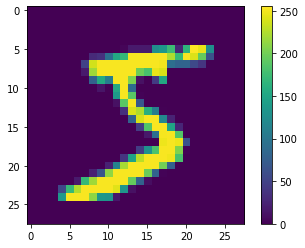

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

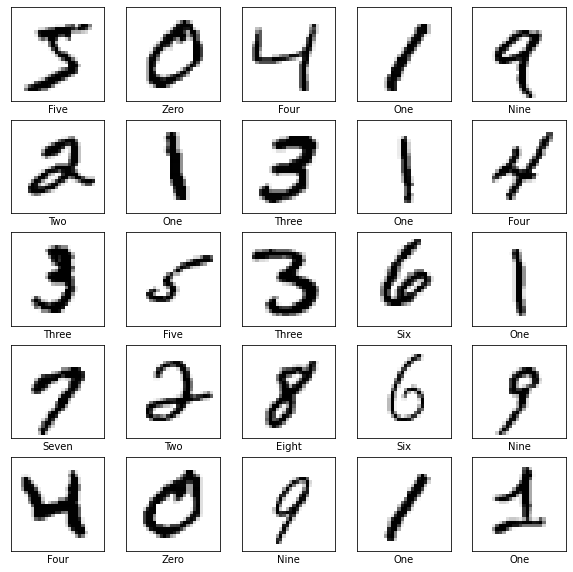

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4383 - accuracy: 0.8738
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1191 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0339 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0165 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.99 (or 99%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0779 - accuracy: 0.9780

Test accuracy: 0.9779999852180481


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([2.0490327e-09, 4.3733150e-10, 2.4998016e-08, 3.7733662e-05,
       3.6912760e-12, 8.5640419e-09, 1.5009732e-16, 9.9985647e-01,
       1.1827927e-08, 1.0570271e-04], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

7

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

7

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

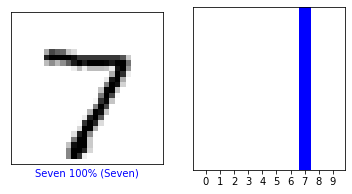

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

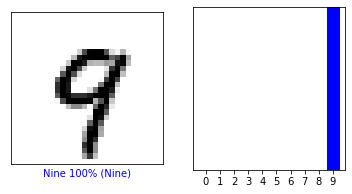

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

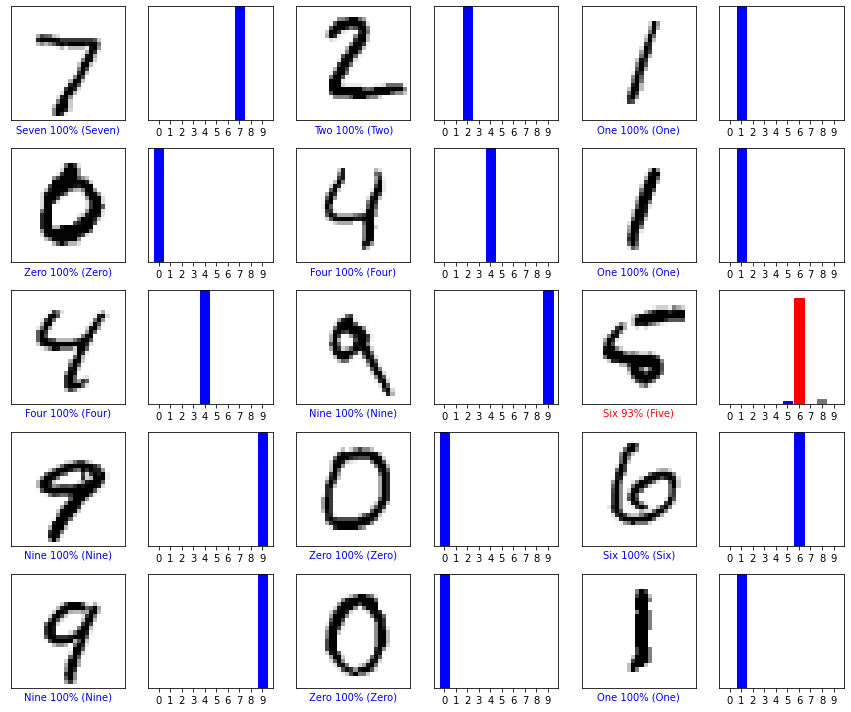

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.7944385e-11 1.8958676e-07 9.9999928e-01 1.9862896e-09 2.5948092e-16
  7.5403266e-14 4.2645246e-10 1.4760763e-17 4.2072614e-07 2.9797605e-13]]


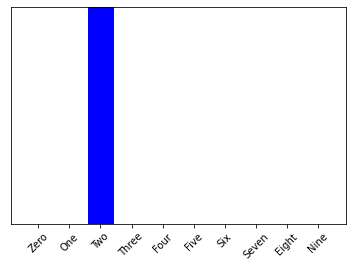

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

### **Section 3 :**

**Modification No 1: sigmoid activation function**

In [ ]:
model_Modification1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model_Modification1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_Modification1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6605 - accuracy: 0.8384
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2087 - accuracy: 0.9406
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1541 - accuracy: 0.9554
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1162 - accuracy: 0.9665
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0916 - accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9896
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [ ]:
test_loss, test_acc = model_Modification1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0776 - accuracy: 0.9760

Test accuracy: 0.9760000109672546


**Modification No 2: optimizer='SGD'**

In [ ]:
model_Modification2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model_Modification2.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_Modification2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0193 - accuracy: 0.7429
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.9011
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2931 - accuracy: 0.9168
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9262
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2406 - accuracy: 0.9334
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2158 - accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2012 - accuracy: 0.9446
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1882 - accuracy: 0.9476
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1705 - accuracy: 0.9535
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.165

In [ ]:
test_loss, test_acc = model_Modification2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1614 - accuracy: 0.9542

Test accuracy: 0.954200029373169


**Modification No 3: epochs=20**

In [ ]:
model_Modification3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model_Modification3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_Modification3.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4361 - accuracy: 0.8771
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9643
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9770
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9822
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9867
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9939
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0163 - accuracy: 0.9951
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.012

In [ ]:
test_loss, test_acc = model_Modification3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1102 - accuracy: 0.9780

Test accuracy: 0.9779999852180481


### **Section 4 :**

In [ ]:
Correct_len = 0
for i in range(len(predictions)):
  if np.argmax(predictions[i]) == test_labels[i]:
    Correct_len += 1

Correct_predict = np.zeros([Correct_len,10])
inCorrect_predict = np.zeros([(10000 - Correct_len),10])

c1 = 0
c2 = 0
for i in range(len(predictions)):
  if np.argmax(predictions[i]) == test_labels[i]:
    Correct_predict[c1] = predictions[i]
    c1 += 1
  else:
    inCorrect_predict[c2] = predictions[i]
    c2 += 1

Should Be Correct Answers:  9780
Should Be inCorrect Answers:  220
Mean Accuracy of Corrected Elements:  0.9921536826465759
Mean Accuracy of inCorrected Elements:  0.7860704426061024


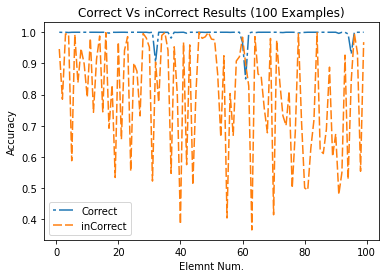

In [ ]:
x1 = []
x2 = []
y1 = []
y2 = []

for i in range(len(Correct_predict)):
  x1.append(i)
  y1.append(np.max(Correct_predict[i]))
for i in range(len(inCorrect_predict)):
  x2.append(i)
  y2.append(np.max(inCorrect_predict[i]))

print("Should Be Correct Answers: ", len(Correct_predict))
print("Should Be inCorrect Answers: ", len(inCorrect_predict))
print("Mean Accuracy of Corrected Elements: ", np.mean(y1))
print("Mean Accuracy of inCorrected Elements: ", np.mean(y2))

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x1[1:100], y1[1:100], label='Correct')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x2[1:100], y2[1:100], dashes=[6, 2], label='inCorrect')

ax.legend()

# naming the x axis 
plt.xlabel('Elemnt Num.') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title("Correct Vs inCorrect Results (100 Examples)") 
  
# function to show the plot 
plt.show()

### **Section 5 :**

In [ ]:
fashion_mnist_test = tf.keras.datasets.fashion_mnist

(train_images_fa, train_labels_fa), (test_images_fa, test_labels_fa) = fashion_mnist_test.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names_fa = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images_fa = train_images_fa / 255.0

test_images_fa = test_images_fa / 255.0

In [ ]:
predictions_fa = model.predict(test_images_fa)

In [ ]:
Correct_len = 0
for i in range(len(predictions_fa)):
  if np.argmax(predictions_fa[i]) == test_labels_fa[i]:
    Correct_len += 1

Correct_predict = np.zeros([Correct_len,10])
inCorrect_predict = np.zeros([(10000 - Correct_len),10])

c1 = 0
c2 = 0
for i in range(len(predictions_fa)):
  if np.argmax(predictions_fa[i]) == test_labels_fa[i]:
    Correct_predict[c1] = predictions_fa[i]
    c1 += 1
  else:
    inCorrect_predict[c2] = predictions_fa[i]
    c2 += 1

Should Be Correct Answers:  1095
Should Be inCorrect Answers:  8905
Mean Accuracy of Corrected Elements:  9.37989212685524
Mean Accuracy of inCorrected Elements:  13.723704116298267


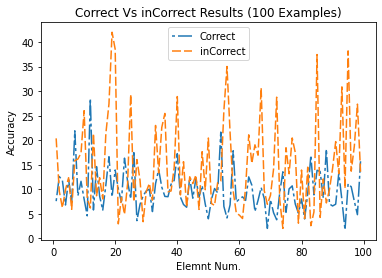

In [ ]:
x1 = []
x2 = []
y1 = []
y2 = []

for i in range(len(Correct_predict)):
  x1.append(i)
  y1.append(np.max(Correct_predict[i]))
for i in range(len(inCorrect_predict)):
  x2.append(i)
  y2.append(np.max(inCorrect_predict[i]))

print("Should Be Correct Answers: ", len(Correct_predict))
print("Should Be inCorrect Answers: ", len(inCorrect_predict))
print("Mean Accuracy of Corrected Elements: ", np.mean(y1))
print("Mean Accuracy of inCorrected Elements: ", np.mean(y2))

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x1[1:100], y1[1:100], label='Correct')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x2[1:100], y2[1:100], dashes=[6, 2], label='inCorrect')

ax.legend()

# naming the x axis 
plt.xlabel('Elemnt Num.') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title("Correct Vs inCorrect Results (100 Examples)") 
  
# function to show the plot 
plt.show()